<a href="https://colab.research.google.com/github/chalarm1405/DWDM21_/blob/main/Project%20for%20Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#กลุ่ม วากาเมะ

#ปัญหา : ต้องการพยากรณ์ว่าใช้ประเภทของระบบกำจัดของเสียประเภทใดมีการใช้มากที่สุด

#ใช้ข้อมูลทั้งหมด 3 ชุด 
- ข้อมูลระบบกำจัดของเสีย อ้างอิงจาก : https://data.go.th/
- ข้อมูลค่าเฉลี่ยประชากร อ้างอิงจาก : https://data.go.th/
- ข้อมูลรายได้ประชารกร อ้างอิงจาก : https://data.go.th/

ไฟล์ที่ใช้ทั้งหมด : https://drive.google.com/drive/folders/1nETPdrCX90tF_F-4eNZQIacxdAMNrqUQ?usp=sharing

In [1848]:
import pandas as pd #ทำงานกับข้อมูลลักษณะตาราง

In [1849]:
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1850]:
import os # os ไว้จัดการไฟล์และถาท ถาทคือที่อยู่ของไฟล์

In [1851]:
path = '/content/drive/My Drive/DWDM2021_DATA' #ชื่อ path ชี้ไปไฟล์ที่เราต้องการ
data_BB = pd.read_csv(os.path.join(path,'บำบัดของเสีย.csv'))
data_BB #ข้อมูลหลักชุดที่ 1

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
2,3,เหนือ,1,เชียงราย,ทต.แม่สาย,บ้านเหมืองแดง ม.2 ต.แม่สาย อ.แม่สาย จ.เชียงราย,AL,ระบบสระเติมอากาศ,2556,NaN,อยู่ระหว่างการก่อสร้าง,"6,500",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
3,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
4,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
90,91,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
91,92,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
92,93,ตะวันออกเฉียงเหนือ,3,ศรีสะเกษ,ทม.ศรีสะเกษ,สวนสักการะ ต.ขุขันธ์ ต.หนองครก อ.เมืองศรีสะเกษ...,OD,ระบบคลองวนเวียน,2560,NaN,อยู่ระหว่างการก่อสร้าง,"12,600",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม


In [1852]:
data_PP = pd.read_csv(os.path.join(path,'ค่าเฉลี่ยประชากร.csv'))
data_PP.dropna() #ข้อมูลรองชุดที่ 2

,จังหวัด,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,กรุงเทพมหานคร,12.30,10.87,11.66,11.11,8.13,54.07
1,สมุทรปราการ,11.17,9.38,10.34,9.88,7.29,48.06
2,นนทบุรี,12.12,10.87,11.49,10.86,8.06,53.40
3,ปทุมธานี,11.33,10.20,10.84,10.31,7.08,49.76
4,อยุธยา,11.11,9.04,10.26,9.32,5.47,45.20
...,...,...,...,...,...,...,...
72,ตรัง,10.16,8.31,9.29,8.45,5.06,41.27
73,พัทลุง,10.83,8.67,9.75,8.51,4.83,42.59
74,ปัตตานี,9.77,7.03,8.68,7.70,3.67,36.85
75,ยะลา,10.69,8.05,9.61,8.63,3.56,40.54


In [1853]:
data_PC = pd.read_csv(os.path.join(path,'รายได้เฉลี่ย.csv'))
data_PC.dropna() #ข้อมูลรองชุดที่ 3

,จังหวัด,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,กรุงเทพมหานคร,th-bm,570327.58,626535.05,634803.16,730318.31,822454.21,947946.30000,1051118.51,5.383503e+06
1,กาญจนบุรี,th-kn,11910.00,13417.00,14576.27,17659.54,20404.73,24440.77288,27138.35,1.295467e+05
2,จันทบุรี,th-ct,4214.00,4569.00,4673.31,5239.98,5630.03,7628.47000,8469.45,4.042424e+04
3,ฉะเชิงเทรา,th-cc,3571.69,3735.06,3781.62,3984.33,4240.41,4655.55000,5007.28,2.897594e+04
4,ชลบุรี,th-cb,100537.00,111109.00,105920.27,126030.24,187788.42,240610.45000,272435.77,1.144431e+06
...,...,...,...,...,...,...,...,...,...,...
72,ระนอง,th-rn,2780.00,3250.00,3272.34,3623.68,3954.75,4311.07000,4706.13,2.589797e+04
73,สงขลา,th-sg,26702.00,37276.00,41304.80,47260.67,53493.02,59831.77000,68097.42,3.339657e+05
74,สตูล,th-sa,5332.00,5905.00,6162.46,6846.72,7438.85,8168.70000,9101.47,4.895520e+04
75,สุราษฎร์ธานี,th-st,35312.00,51550.00,56952.27,65420.63,76546.39,92228.01000,104503.71,4.825130e+05


#ดูว่าข้อมูลมี data missing

In [1854]:
data_BB.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,False,False,False,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,True,False,False,False


In [1855]:
data_PP.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,จังหวัด,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False


In [1856]:
data_PC.isnull() #ดูว่าข้อมูลนั้นมี Missing รึป่าว

,จังหวัด,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False


#สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing

In [1857]:
data_BB.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

ที่                                       False
ภาค                                       False
โซน                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                         True
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)      True
แหล่งงบประมาณ                             False
dtype: bool

In [1858]:
data_PP.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

จังหวัด        False
15 - 39 ปี     False
40 - 59 ปี     False
15 - 59 ปี     False
15 ปีขึ้นไป    False
60 ปีขึ้นไป    False
ผลเฉลี่ย       False
dtype: bool

In [1859]:
data_PC.isnull().any() #any สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing ไหม

จังหวัด        False
รหัสจังหวัด    False
2555           False
2556           False
2557           False
2558           False
2559           False
2560           False
2561           False
รวมเฉลี่ย      False
dtype: bool

จากการตรวจสอบค่า missing value ของทั้ง 3 ชุดข้อมูลพบว่ามีค่าเป็น Ture อยู่ 3 colum ในข้อมูลชุดที่ 1 คือ พ.ศ. ที่เปิดใช้งาน และ ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)

#Drop missing value
เป็นการลบข้อมูลที่มีค่า missing ออกไปจากตาราง

In [1860]:
data_BB = data_BB.dropna()
data_BB

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
3,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
4,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
5,6,เหนือ,1,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
89,90,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม
90,91,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...
91,92,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม


#ตรวสจสอบเมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่

In [1861]:
data_BB.isnull().any()

ที่                                       False
ภาค                                       False
โซน                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                        False
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)     False
แหล่งงบประมาณ                             False
dtype: bool

#Percent of missing data from dropna 
เป็นการตรวจสอบว่าเมื่อลบข้อมูลทิ้งไปแล้วเราสูญเสียข้อมูลไปกี่เปอร์เซ็นต์

In [1862]:
before = 94
after = 85
print(f'before = {before} \nafter = {after}\nwhich is {100*((before-after)/before)}')

before = 94 
after = 85
which is 9.574468085106384


จะเห็นได้ว่าค่าของข้อมูลที่สูญหายไปคิดเป็น 9.574468085106384 %

#รวมตาราง

In [1863]:
table = pd.merge(data_BB,data_PP,on='จังหวัด') #รวมตารางข้อมูลชุดที่ 1 และ 2

In [1864]:
table

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36
2,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06
3,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96
4,6,เหนือ,1,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,89,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80
74,90,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80
75,91,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25
76,92,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25


In [1865]:
table_3 = pd.merge(table,data_PC,on='จังหวัด') #รวมตารางข้อมูลชุดที่ 1 และ 2 และ 3

In [1866]:
table_3

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.0,58551.0,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.0,1580.0,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
4,6,เหนือ,1,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.0,994.0,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,89,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
70,90,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
71,91,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14
72,92,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14


In [1867]:
table_3.isnull().any()

ที่                                       False
ภาค                                       False
โซน                                       False
จังหวัด                                   False
หน่วยงานที่รับผิดชอบ                      False
ที่ตั้ง                                   False
ชื่อย่อของระบบ                            False
ประเภทของระบบ                             False
พ.ศ. ที่ได้รับงบประมาณ                    False
พ.ศ. ที่เปิดใช้งาน                        False
สถานภาพปัจจุบัน                           False
 ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน)     False
แหล่งงบประมาณ                             False
15 - 39 ปี                                False
40 - 59 ปี                                False
15 - 59 ปี                                False
15 ปีขึ้นไป                               False
60 ปีขึ้นไป                               False
ผลเฉลี่ย                                  False
รหัสจังหวัด                               False
2555                                    

In [1868]:
table_3.shape #ตาราง table_3 มี 74 แถว 27 colum

(74, 28)

In [1869]:
table_3.mean() #ตวจสอบค่าเฉลี่ยของแต่ละบริษัท

ที่                           43.554054
โซน                            3.175676
พ.ศ. ที่ได้รับงบประมาณ      2547.472973
พ.ศ. ที่เปิดใช้งาน          2549.783784
15 - 39 ปี                    10.619324
40 - 59 ปี                     7.901081
15 - 59 ปี                     9.314459
15 ปีขึ้นไป                    8.295541
60 ปีขึ้นไป                    4.948514
ผลเฉลี่ย                      41.078919
2555                       21061.964865
2556                       24107.887027
2557                       24559.745000
2558                       28074.892297
2559                       34835.735946
2560                       41877.167838
2561                       47024.057838
รวมเฉลี่ย                 221541.450811
dtype: float64

#ตรวจสอบดูการลบข้อมูลที่ซ้ำกัน

In [1870]:
table_3_un = table_3.drop_duplicates()
table_3_un

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.0,20729.0,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.0,58551.0,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.0,1580.0,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
4,6,เหนือ,1,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.0,994.0,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,89,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทน.อุดรธานี,บ.หนองบุ ต.สามพร้าว และ บ.ดอนหวาย ต.กุดสระ อ.เ...,SP,ระบบบ่อปรับเสถียร,2551,2554.0,เปิดเดินระบบ,"43,902",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
70,90,ตะวันออกเฉียงเหนือ,3,อุดรธานี,ทม.หนองสำโรง,เทศบาลนครอุดรธานี อ.เมืองอุดรธานี จ.อุดรธานี,WCS,ระบบรวบรวมน้ำเสีย,2559,2563.0,เปิดเดินระบบ,800,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.36,7.48,9.00,8.07,4.89,39.80,th-un,6358.0,7275.0,7458.99,7970.33,8424.29,9892.51,10786.68,58165.80
71,91,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทน.อุบลราชธานี,ถ.พโลรังฤทธิ์ อ.เมืองอุบลราชธานี จ.อุบลราชธานี,OD,ระบบคลองวนเวียน,2546,2546.0,เปิดเดินระบบ,"22,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14
72,92,ตะวันออกเฉียงเหนือ,3,อุบลราชธานี,ทม.วารินชำราบ,บริเวณชุมชนเกตุแก้ว อ.วารินชำราบ จ.อุบลราชธานี,SP,ระบบบ่อปรับเสถียร,2541,2545.0,เปิดเดินระบบ,"18,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,9.74,6.47,8.24,7.33,4.47,36.25,th-ur,4731.0,5333.0,5450.23,5565.11,5932.51,7375.12,7990.17,42377.14


จากการตรวจสอบข้อมูลที่ซ้ำ ของ table พบว่าไม่มีค่าข้อมูลที่ซ้ำกัน

#Data Mining

#สร้างตารางที่ใช้ในการดู challenge

In [1871]:
data = table_3[['จังหวัด','ประเภทของระบบ','ผลเฉลี่ย','รวมเฉลี่ย']]
data

,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
0,เชียงราย,ระบบสระเติมอากาศ,36.36,160035.50
1,เชียงราย,ระบบบึงประดิษฐ์,36.36,160035.50
2,เชียงใหม่,ระบบสระเติมอากาศ,39.06,557866.57
3,น่าน,ระบบบ่อปรับเสถียร,39.96,13634.01
4,พะเยา,ระบบบ่อปรับเสถียร,40.28,7862.51
...,...,...,...,...
69,อุดรธานี,ระบบบ่อปรับเสถียร,39.80,58165.80
70,อุดรธานี,ระบบรวบรวมน้ำเสีย,39.80,58165.80
71,อุบลราชธานี,ระบบคลองวนเวียน,36.25,42377.14
72,อุบลราชธานี,ระบบบ่อปรับเสถียร,36.25,42377.14


In [1872]:
data.shape #ข้อมูลนี้มี 74 แถว 3 คอลัม

(74, 4)

In [1873]:
data.isnull().any() #ตรวจสอบว่าตารางมีค่าว่างหรือไม่ จะเห็นว่าไม่คอลัมน์ที่มีค่าว่าง

จังหวัด          False
ประเภทของระบบ    False
ผลเฉลี่ย         False
รวมเฉลี่ย        False
dtype: bool

#สร้างตารางที่ค่าเฉลี่ยนประชากรมากกว่า 40

In [1874]:
data = table_3[table_3['ผลเฉลี่ย']>=40]
data

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
4,6,เหนือ,1,พะเยา,ทม.พะเยา,ซอยข้างสินธานี ต.แม่ต๋ำ อ.เมืองพะเยา จ.พะเยา,SP,ระบบบ่อปรับเสถียร,2538,2541.0,เปิดเดินระบบ,"9,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,11.26,7.56,9.17,7.84,4.45,40.28,th-py,937.00,994.00,1009.89,1090.10,1164.62,1286.52,1380.38,7862.51
5,7,เหนือ,1,ลำปาง,ทน.ลำปาง,บ้านปงแสน ม.5 ต.ปงแสนทอง อ.เมืองลำปาง จ.ลำปาง,SP,ระบบบ่อปรับเสถียร,2545,2548.0,เปิดเดินระบบ,"12,300",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.32,7.64,9.26,7.80,4.43,40.45,th-lg,2130.00,2345.00,2437.27,2699.14,2899.70,3773.95,4202.99,20488.05
6,8,เหนือ,1,ลำพูน,ทม.ลำพูน,ถ.หลังสนามกีฬากลาง ต.ในเมือง อ.เมืองลำพูน จ.ลำพูน,SBR,ระบบเอสบีอาร์,2543,2546.0,เปิดเดินระบบ,"10,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.12,7.84,9.58,8.35,4.84,41.73,th-ln,930.00,1077.00,1124.06,1304.91,1373.39,1476.08,1593.53,8878.97
7,9,เหนือ,1,อุตรดิตถ์,ทม.อุตรดิตถ์,จุดที่ 1 สวนสาธารณะริมแม่น้ำน่าน จุดที่ 2 สวนส...,Cluster,ระบบกลุ่มอาคาร,2552,2553.0,ไม่เปิดเดินระบบ,320,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.25,8.04,9.55,8.13,5.03,42.00,th-ud,1146.00,1200.00,1312.10,1510.72,1868.96,2071.57,2206.06,11315.41
8,10,ใต้,4,กระบี่,อบต.อ่าวนาง,ม.7 ต.อ่าวนาง อ.เมืองกระบี่ จ.กระบี่ (เกาะพีพี),AS+WL,ระบบตะกอนเร่ง+บึงประดิษฐ์,2538,2541.0,เปิดเดินระบบ,400,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.52,8.22,9.54,8.78,4.81,41.87,th-kr,48271.00,64979.00,71206.79,76840.01,85694.48,105029.06,118676.13,570696.47
9,11,ใต้,4,กระบี่,อบต.อ่าวนาง,ม.2 ต.อ่าวนาง อ.เมืองกระบี่ จ.กระบี่,Cluster,ระบบกลุ่มอาคาร,2552,2552.0,ไม่เปิดเดินระบบ,400,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.52,8.22,9.54,8.78,4.81,41.87,th-kr,48271.00,64979.00,71206.79,76840.01,85694.48,105029.06,118676.13,570696.47
10,12,ใต้,4,ตรัง,ทน.ตรัง,ถนนเลี่ยงเมืองตรัง หมายเลข 419 ต.นาตาล่วง อ.เม...,AL,ระบบสระเติมอากาศ,2545,2548.0,เปิดเดินระบบ,"17,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.16,8.31,9.29,8.45,5.06,41.27,th-tg,6231.00,6679.00,6806.73,7500.31,8214.94,9028.01,9916.29,54376.28
11,13,ใต้,4,นครศรีธรรมราช,ทน.นครศรีธรรมราช,ม.2 ต.นาทราย อ.เมืองนครศรีธรรมราช จ.นครศรีธรรมราช,SP,ระบบบ่อปรับเสถียร,2550,2558.0,เปิดเดินระบบ,"33,700",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.41,8.67,9.57,8.49,5.14,42.28,th-nt,8724.00,10398.00,11829.74,13335.45,14396.87,15609.04,17136.46,91429.56
12,14,ใต้,4,นครศรีธรรมราช,ทม.ทุ่งสง,บริเวณหลังเขาชัยชุมพล ต.ปากแพรก อ.ทุ่งสง จ.นคร...,RBC,ระบบจานหมุนชีวภาพ,2551,2553.0,เปิดเดินระบบ,"10,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.41,8.67,9.57,8.49,5.14,42.28,th-nt,8724.00,10398.00,11829.74,13335.45,14396.87,15609.04,17136.46,91429.56
13,15,ใต้,4,ภูเก็ต,ทน.ภูเก็ต,ถ.รัตนโกสินทร์ 200 ปี ต.วิชิต อ.เมือง จ.ภูเก็ต,OD,ระบบคลองวนเวียน,2541,2545.0,เปิดเดินระบบ,"36,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.91,9.26,10.30,9.78,6.10,46.35,th-pu,228985.00,260442.00,263616.13,301532.21,363000.47,423012.85,477324.35,2317913.01


#แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [1875]:
table = data.groupby('จังหวัด')['ประเภทของระบบ'].apply(list)
table

จังหวัด
กระบี่               [ระบบตะกอนเร่ง+บึงประดิษฐ์ , ระบบกลุ่มอาคาร ]
ขอนแก่น                       [ระบบสระเติมอากาศ, ระบบบึงประดิษฐ์ ]
จันทบุรี                                       [ระบบบ่อปรับเสถียร]
ฉะเชิงเทรา                   [ระบบคลองวนเวียน , ระบบบ่อปรับเสถียร]
ชลบุรี           [ระบบบ่อปรับเสถียร, ระบบสระเติมอากาศ, ระบบบึงป...
ชัยนาท                        [ระบบสระเติมอากาศ, ระบบบึงประดิษฐ์ ]
ตรัง                                            [ระบบสระเติมอากาศ]
นครศรีธรรมราช              [ระบบบ่อปรับเสถียร, ระบบจานหมุนชีวภาพ ]
นครสวรรค์        [ระบบตะกอนเร่งแบบชีวมวล , ระบบบ่อปรับเสถียร, ร...
นนทบุรี                           [ระบบตะกอนเร่ง , ระบบตะกอนเร่ง ]
พะเยา                                          [ระบบบ่อปรับเสถียร]
พิจิตร                       [ระบบสระเติมอากาศ, ระบบบ่อปรับเสถียร]
พิษณุโลก         [ระบบบ่อปรับเสถียร, ระบบกลุ่มอาคาร , ระบบกลุ่ม...
ภูเก็ต           [ระบบคลองวนเวียน , ระบบคลองวนเวียน , ระบบคลองว...
มหาสารคาม                                      [ระบบบ่

#ขั้นตอนติดตั้ง apyori

In [1876]:
!pip install apyori

#เป็นการเรียกใช้ฟังก์ชัน apriori

In [1877]:
from apyori import apriori

#ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [1878]:
test_1 = list(apriori(table, min_support = 0.05))
test_1

[RelationRecord(items=frozenset({'ระบบกลุ่มอาคาร '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบกลุ่มอาคาร '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบคลองวนเวียน '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบคลองวนเวียน '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบึงประดิษฐ์ '}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบึงประดิษฐ์ '}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบ่อปรับเสถียร'}), support=0.5384615384615384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.5384615384615384, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบสระเติมอากาศ'}), support=0.34615

#สร้างตารางที่ค่าเฉลี่ยนประชากรน้อยกว่า 40

In [1879]:
dataP = table_3[table_3['ผลเฉลี่ย']<=40]
dataP

,ที่,ภาค,โซน,จังหวัด,หน่วยงานที่รับผิดชอบ,ที่ตั้ง,ชื่อย่อของระบบ,ประเภทของระบบ,พ.ศ. ที่ได้รับงบประมาณ,พ.ศ. ที่เปิดใช้งาน,สถานภาพปัจจุบัน,ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน),แหล่งงบประมาณ,15 - 39 ปี,40 - 59 ปี,15 - 59 ปี,15 ปีขึ้นไป,60 ปีขึ้นไป,ผลเฉลี่ย,รหัสจังหวัด,2555,2556,2557,2558,2559,2560,2561,รวมเฉลี่ย
0,1,เหนือ,1,เชียงราย,ทน.เชียงราย,ข้างสนามกีฬากลางจังหวัด ถ.สหมิตร ต.รอบเวียง อ....,AL,ระบบสระเติมอากาศ,2540,2544.0,เปิดเดินระบบ,"22,700",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.00,20729.00,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
1,2,เหนือ,1,เชียงราย,ทต.จันจว้า,เลขที่ 49 ม.2 ต.จันจว้า อ.แม่จัน จ.เชียงราย,WL,ระบบบึงประดิษฐ์,2548,2550.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.43,6.39,8.40,7.24,3.90,36.36,th-cr,18818.00,20729.00,20249.36,22060.88,23575.97,26053.86,28548.43,160035.50
2,4,เหนือ,1,เชียงใหม่,ทน.เชียงใหม่,หลังวัดท่าใหม่อิ ต.สันผักหวาน อ.หางดง จ.เชียงใหม่,AL,ระบบสระเติมอากาศ,2545,2547.0,เปิดเดินระบบ,"55,000",กระทรวงมหาดไทย กระทรวงทรัพยากรธรรมชาติและสิ่งแ...,10.28,7.34,8.99,7.96,4.49,39.06,th-cm,53864.00,58551.00,69941.56,80316.30,88110.34,99070.42,108012.95,557866.57
3,5,เหนือ,1,น่าน,ทม.น่าน,ถ.ผากอง ต.ในเวียง อ.เมืองน่าน จ.น่าน,SP,ระบบบ่อปรับเสถียร,2540,2544.0,เปิดเดินระบบ,"8,259",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11.08,7.58,9.13,7.77,4.40,39.96,th-na,1377.00,1580.00,1606.33,1910.35,2031.31,2462.93,2666.09,13634.01
20,23,กลาง,2,กำแพงเพชร,ทม.กำแพงเพชร,ถนนเลี่ยงเมือง หมู่ 6 ต.เทพนคร สี่แยกถนนพิจิตร...,SP,ระบบบ่อปรับเสถียร,2539,2543.0,เปิดเดินระบบ,"13,500",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.39,6.60,8.60,7.32,3.80,36.71,th-kp,856.00,1028.00,1091.20,1219.65,1356.34,1529.10,1616.48,8696.77
21,24,กลาง,2,กำแพงเพชร,ทต.สลกบาตร,ม.1 ถ.สุขาภิบาล 4 ต.สลกบาตร อ.ขาณุวรลักษบุรี จ...,SP,ระบบบ่อปรับเสถียร,2539,2551.0,เปิดเดินระบบ,500,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.39,6.60,8.60,7.32,3.80,36.71,th-kp,856.00,1028.00,1091.20,1219.65,1356.34,1529.10,1616.48,8696.77
22,25,กลาง,2,นครสวรรค์,ทน.นครสวรรค์,ซอยโกสีย์ 33 ถนน ต.ปากน้ำโพ อ.เมืองนครสวรรค์ จ...,MSBR,ระบบตะกอนเร่งแบบชีวมวล,2548,2551.0,เปิดเดินระบบ,"36,000",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
23,26,กลาง,2,นครสวรรค์,ทม.ชุมแสง,ม.12 ต.พิกุล อ.ชุมแสง จ.นครสวรรค์,SP,ระบบบ่อปรับเสถียร,2539,2540.0,ไม่เปิดเดินระบบ,"1,650",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
24,27,กลาง,2,นครสวรรค์,ทต.ท่าตะโก,บริเวณคลองเมรี ชุมชนเจ้าแม่ราตรี ม.1 ถ.แสงเดือ...,WL,ระบบบึงประดิษฐ์,2550,2551.0,เปิดเดินระบบ,50,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.69,7.62,9.18,7.85,4.66,40.00,th-ns,1846.00,2222.00,2258.89,2959.53,3277.30,3641.46,3899.68,20104.86
30,33,กลาง,2,สุโขทัย,ทม.สุโขทัยธานี,บ้านบางกระบาน ม.10 ต.ยางซ้าย อ.เมืองสุโขทัย จ....,SP,ระบบบ่อปรับเสถียร,2545,2547.0,เปิดเดินระบบ,"8,400",กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10.57,7.58,8.97,7.65,4.67,39.44,th-so,2148.00,2513.00,2711.35,2979.59,3131.71,3510.33,3717.76,20711.74


#แปลงให้ข้อมูลอยู่ในรูปแบบเป็น transaction

In [1880]:
table2 = dataP.groupby('จังหวัด')['ประเภทของระบบ'].apply(list)
table2

จังหวัด
กาฬสินธุ์                                     [ระบบสระเติมอากาศ]
กำแพงเพชร                 [ระบบบ่อปรับเสถียร, ระบบบ่อปรับเสถียร]
ชัยภูมิ                                       [ระบบสระเติมอากาศ]
ตาก                       [ระบบบ่อปรับเสถียร, ระบบบ่อปรับเสถียร]
นครปฐม                                        [ระบบสระเติมอากาศ]
นครพนม                                       [ระบบบ่อปรับเสถียร]
นครสวรรค์      [ระบบตะกอนเร่งแบบชีวมวล , ระบบบ่อปรับเสถียร, ร...
น่าน                                         [ระบบบ่อปรับเสถียร]
ยโสธร                                        [ระบบบ่อปรับเสถียร]
สกลนคร                          [ระบบบ่อปรับเสถียร+บึงประดิษฐ์ ]
สุพรรณบุรี                                   [ระบบบ่อปรับเสถียร]
สุรินทร์                   [ระบบบ่อปรับเสถียร, ระบบบึงประดิษฐ์ ]
สุโขทัย                                      [ระบบบ่อปรับเสถียร]
อำนาจเจริญ                                   [ระบบบ่อปรับเสถียร]
อุดรธานี                 [ระบบบ่อปรับเสถียร, ระบบรวบรวมน้ำเสีย ]
อุทัยธานี        

#ผลลัพธ์ที่ได้จากการทำ Associantion ซึ่งรายละเอียดจะอยู่ที่ summary

In [1881]:
test_2 = list(apriori(table2, min_support = 0.06 ))
test_2

[RelationRecord(items=frozenset({'ระบบบึงประดิษฐ์ '}), support=0.15, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบึงประดิษฐ์ '}), confidence=0.15, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบ่อปรับเสถียร'}), support=0.65, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.65, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบสระเติมอากาศ'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบสระเติมอากาศ'}), confidence=0.25, lift=1.0)]),
 RelationRecord(items=frozenset({'ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร'}), confidence=0.1, lift=1.0), OrderedStatistic(items_base=frozenset({'ระบบบึงประดิษฐ์ '}), items_add=frozenset({'ระบบบ่อปรับเสถียร'}), confidence=0.6666666666666667, lift=1.02564

#SUMMARY

In [1882]:
summary_1 = pd.read_csv(os.path.join(path,'มากกว่า 40.csv')) #ที่เป็น CSV เนื่องจากกลัวอาจารย์อ่านยากจึงนำข้อมูลที่อ่านได้ไปใส่ excell และแสดงออกมาเพื่อความสะดวกในการตรวจ
summary_1

,SUMMARY > 40,Unnamed: 1
0,ระบบ,ร้อยละ
1,ระบบกลุ่มอาคาร,15.38%
2,ระบบคลองวนเวียน,15.38%
3,ระบบบึงประดิษฐ์,15.38%
4,ระบบบ่อปรับเสถียร,53.84%
5,ระบบสระเติมอากาศ,34.61%
6,"ระบบบ่อปรับเสถียร', 'ระบบคลองวนเวียน",7.69%
7,"ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร",7.69%
8,"ระบบสระเติมอากาศ', 'ระบบบึงประดิษฐ์",11.53%
9,"ระบบสระเติมอากาศ', 'ระบบบ่อปรับเสถียร",15.38%


จะเห็นได้ว่าค่าเฉลี่ยนของประชากรมากกว่า 40 มักจะนิยมใช้ระบบกำจัดของเสียแบบบ่อปรับเสถียรมากที่สุด

In [1883]:
summary_2 = pd.read_csv(os.path.join(path,'น้อยกว่า 40.csv')) #ที่เป็น CSV เนื่องจากกลัวอาจารย์อ่านยากจึงนำข้อมูลที่อ่านได้ไปใส่ excell และแสดงออกมาเพื่อความสะดวกในการตรวจ
summary_2

,SUMMARY < 40,Unnamed: 1
0,ระบบ,ร้อยละ
1,ระบบบึงประดิษฐ์,15%
2,ระบบบ่อปรับเสถียร,65%
3,ระบบสระเติมอากาศ,25%
4,"ระบบบึงประดิษฐ์ ', 'ระบบบ่อปรับเสถียร",10%


In [1884]:
from pandas.api.types import CategoricalDtype

In [1885]:
table_3.columns #

Index(['ที่', 'ภาค', 'โซน', 'จังหวัด', 'หน่วยงานที่รับผิดชอบ', 'ที่ตั้ง',
       'ชื่อย่อของระบบ', 'ประเภทของระบบ', 'พ.ศ. ที่ได้รับงบประมาณ',
       'พ.ศ. ที่เปิดใช้งาน', 'สถานภาพปัจจุบัน',
       ' ปริมาณน้ำเสียที่รองรับได้ (ลบ.ม/วัน) ', 'แหล่งงบประมาณ', '15 - 39 ปี',
       '40 - 59 ปี', '15 - 59 ปี', '15 ปีขึ้นไป', '60 ปีขึ้นไป', 'ผลเฉลี่ย',
       'รหัสจังหวัด', '2555', '2556', '2557', '2558', '2559', '2560', '2561',
       'รวมเฉลี่ย'],
      dtype='object')

#Plot กราฟ เพื่อดุค่าของข้อมูลผลเฉลี่ยในแต่ละจังหวัด

In [1886]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [1887]:
table_3.iloc[:,17:18]

,60 ปีขึ้นไป
0,3.90
1,3.90
2,4.49
3,4.40
4,4.45
...,...
69,4.89
70,4.89
71,4.47
72,4.47


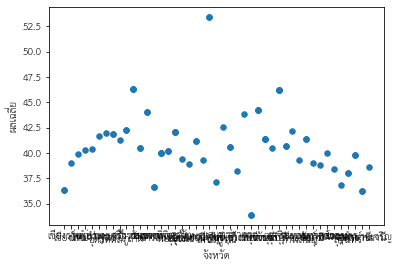

In [1888]:
table_3.plot.scatter('จังหวัด','ผลเฉลี่ย', s = 30)

#Classification
ตรวจสอบพยากรณ์ว่าผลเฉลี่ยและรวมเฉลี่ยมีผลต่อประเภทของระบบอย่างไร

#ทำการดูว่าประเภทของระบบใดในแต่ละภาคมีการใช้มากสุด

In [1889]:
data_1 = table_3[['โซน','ภาค','จังหวัด','ประเภทของระบบ','ผลเฉลี่ย','รวมเฉลี่ย']] #เลือก colum ที่ต้องการจะศึกษา
data_1

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
0,1,เหนือ,เชียงราย,ระบบสระเติมอากาศ,36.36,160035.50
1,1,เหนือ,เชียงราย,ระบบบึงประดิษฐ์,36.36,160035.50
2,1,เหนือ,เชียงใหม่,ระบบสระเติมอากาศ,39.06,557866.57
3,1,เหนือ,น่าน,ระบบบ่อปรับเสถียร,39.96,13634.01
4,1,เหนือ,พะเยา,ระบบบ่อปรับเสถียร,40.28,7862.51
...,...,...,...,...,...,...
69,3,ตะวันออกเฉียงเหนือ,อุดรธานี,ระบบบ่อปรับเสถียร,39.80,58165.80
70,3,ตะวันออกเฉียงเหนือ,อุดรธานี,ระบบรวบรวมน้ำเสีย,39.80,58165.80
71,3,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ระบบคลองวนเวียน,36.25,42377.14
72,3,ตะวันออกเฉียงเหนือ,อุบลราชธานี,ระบบบ่อปรับเสถียร,36.25,42377.14


In [1890]:
Nortdata = data_1[data_1['ภาค']=='เหนือ']
Nortdata

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
0,1,เหนือ,เชียงราย,ระบบสระเติมอากาศ,36.36,160035.50
1,1,เหนือ,เชียงราย,ระบบบึงประดิษฐ์,36.36,160035.50
2,1,เหนือ,เชียงใหม่,ระบบสระเติมอากาศ,39.06,557866.57
3,1,เหนือ,น่าน,ระบบบ่อปรับเสถียร,39.96,13634.01
4,1,เหนือ,พะเยา,ระบบบ่อปรับเสถียร,40.28,7862.51
5,1,เหนือ,ลำปาง,ระบบบ่อปรับเสถียร,40.45,20488.05
6,1,เหนือ,ลำพูน,ระบบเอสบีอาร์,41.73,8878.97
7,1,เหนือ,อุตรดิตถ์,ระบบกลุ่มอาคาร,42.00,11315.41


In [1891]:
Nort = Nortdata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
Nort ##เรียกดูตาราง

,โซน,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,,
ระบบบ่อปรับเสถียร,3,3,3,3,3
ระบบสระเติมอากาศ,2,2,2,2,2
ระบบกลุ่มอาคาร,1,1,1,1,1
ระบบบึงประดิษฐ์,1,1,1,1,1
ระบบเอสบีอาร์,1,1,1,1,1


In [1892]:
Southdata = data_1[data_1['ภาค']=='ใต้']
Southdata

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
8,4,ใต้,กระบี่,ระบบตะกอนเร่ง+บึงประดิษฐ์,41.87,570696.47
9,4,ใต้,กระบี่,ระบบกลุ่มอาคาร,41.87,570696.47
10,4,ใต้,ตรัง,ระบบสระเติมอากาศ,41.27,54376.28
11,4,ใต้,นครศรีธรรมราช,ระบบบ่อปรับเสถียร,42.28,91429.56
12,4,ใต้,นครศรีธรรมราช,ระบบจานหมุนชีวภาพ,42.28,91429.56
13,4,ใต้,ภูเก็ต,ระบบคลองวนเวียน,46.35,2317913.01
14,4,ใต้,ภูเก็ต,ระบบคลองวนเวียน,46.35,2317913.01
15,4,ใต้,ภูเก็ต,ระบบคลองวนเวียน,46.35,2317913.01
16,4,ใต้,ยะลา,ระบบสระเติมอากาศ,40.54,18787.07
17,4,ใต้,ยะลา,ระบบบ่อปรับเสถียร,40.54,18787.07


In [1893]:
South = Southdata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
South ##เรียกดูตาราง

,โซน,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,,
ระบบคลองวนเวียน,3,3,3,3,3
ระบบสระเติมอากาศ,3,3,3,3,3
ระบบบ่อปรับเสถียร,2,2,2,2,2
ระบบกลุ่มอาคาร,1,1,1,1,1
ระบบจานหมุนชีวภาพ,1,1,1,1,1
ระบบตะกอนเร่ง+บึงประดิษฐ์,1,1,1,1,1
ระบบบ่อปรับเสถียร+บึงประดิษฐ์,1,1,1,1,1


In [1894]:
centraldata = data_1[data_1['ภาค']=='กลาง']
centraldata

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
20,2,กลาง,กำแพงเพชร,ระบบบ่อปรับเสถียร,36.71,8696.77
21,2,กลาง,กำแพงเพชร,ระบบบ่อปรับเสถียร,36.71,8696.77
22,2,กลาง,นครสวรรค์,ระบบตะกอนเร่งแบบชีวมวล,40.00,20104.86
23,2,กลาง,นครสวรรค์,ระบบบ่อปรับเสถียร,40.00,20104.86
24,2,กลาง,นครสวรรค์,ระบบบึงประดิษฐ์,40.00,20104.86
25,2,กลาง,พิจิตร,ระบบสระเติมอากาศ,40.16,7068.58
26,2,กลาง,พิจิตร,ระบบบ่อปรับเสถียร,40.16,7068.58
27,2,กลาง,พิษณุโลก,ระบบบ่อปรับเสถียร,42.03,48885.70
28,2,กลาง,พิษณุโลก,ระบบกลุ่มอาคาร,42.03,48885.70
29,2,กลาง,พิษณุโลก,ระบบกลุ่มอาคาร,42.03,48885.70


In [1895]:
central = centraldata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
central ##เรียกดูตาราง

,โซน,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,,
ระบบบ่อปรับเสถียร,9,9,9,9,9
ระบบกลุ่มอาคาร,5,5,5,5,5
ระบบสระเติมอากาศ,4,4,4,4,4
ระบบตะกอนเร่ง,2,2,2,2,2
ระบบบึงประดิษฐ์,2,2,2,2,2
ระบบตะกอนเร่งแบบชีวมวล,1,1,1,1,1


In [1896]:
Eastdata = data_1[data_1['ภาค']=='ตะวันออก']
Eastdata

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
51,5,ตะวันออก,จันทบุรี,ระบบบ่อปรับเสถียร,40.55,40424.24
52,5,ตะวันออก,ชลบุรี,ระบบบ่อปรับเสถียร,46.20,1144431.15
53,5,ตะวันออก,ชลบุรี,ระบบสระเติมอากาศ,46.20,1144431.15
54,5,ตะวันออก,ชลบุรี,ระบบบึงประดิษฐ์,46.20,1144431.15
55,5,ตะวันออก,ชลบุรี,ระบบสระเติมอากาศ,46.20,1144431.15
56,5,ตะวันออก,ฉะเชิงเทรา,ระบบคลองวนเวียน,40.68,28975.94
57,5,ตะวันออก,ฉะเชิงเทรา,ระบบบ่อปรับเสถียร,40.68,28975.94
58,5,ตะวันออก,ระยอง,ระบบคลองวนเวียน,42.22,198263.24


In [1897]:
East = Eastdata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
East ##เรียกดูตาราง

,โซน,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,,
ระบบบ่อปรับเสถียร,3,3,3,3,3
ระบบคลองวนเวียน,2,2,2,2,2
ระบบสระเติมอากาศ,2,2,2,2,2
ระบบบึงประดิษฐ์,1,1,1,1,1


In [1898]:
Northeast = Northeastdata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
Northeast ##เรียกดูตาราง

,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,
ระบบบ่อปรับเสถียร,7,7,7,7
ระบบสระเติมอากาศ,3,3,3,3
ระบบบึงประดิษฐ์,2,2,2,2
ระบบคลองวนเวียน,1,1,1,1
ระบบบ่อปรับเสถียร+บึงประดิษฐ์,1,1,1,1
ระบบรวบรวมน้ำเสีย,1,1,1,1


In [1899]:
Westdata = data_1[data_1['ภาค']=='ตะวันตก']
Westdata

,โซน,ภาค,จังหวัด,ประเภทของระบบ,ผลเฉลี่ย,รวมเฉลี่ย
43,6,ตะวันตก,ตาก,ระบบบ่อปรับเสถียร,33.94,39366.10
44,6,ตะวันตก,ตาก,ระบบบ่อปรับเสถียร,33.94,39366.10
45,6,ตะวันตก,เพชรบุรี,ระบบรวบรวมน้ำเสีย,44.28,155268.69
46,6,ตะวันตก,เพชรบุรี,ระบบสระเติมอากาศ,44.28,155268.69
47,6,ตะวันตก,เพชรบุรี,ระบบบ่อปรับเสถียร,44.28,155268.69
48,6,ตะวันตก,ราชบุรี,ระบบบ่อปรับเสถียร,41.40,17868.95
49,6,ตะวันตก,ราชบุรี,ระบบคลองวนเวียน,41.40,17868.95
50,6,ตะวันตก,ราชบุรี,ระบบบ่อปรับเสถียร,41.40,17868.95


In [1900]:
West = Westdata.groupby('ประเภทของระบบ').count().sort_values(by=['ภาค'],ascending=False) ##นำข้อมูล จังหวัด_y จากตาราง Data โดยพิจารณาจาก StFinal 
West ##เรียกดูตาราง

,โซน,ภาค,จังหวัด,ผลเฉลี่ย,รวมเฉลี่ย
ประเภทของระบบ,,,,,
ระบบบ่อปรับเสถียร,5,5,5,5,5
ระบบคลองวนเวียน,1,1,1,1,1
ระบบรวบรวมน้ำเสีย,1,1,1,1,1
ระบบสระเติมอากาศ,1,1,1,1,1


In [1901]:
X = data_1[['โซน','ผลเฉลี่ย','รวมเฉลี่ย']] #กำหนดค่าของ X และ y เพื่อทำ decision tree ดูค่าความสัมพันธ์
y = data_1['ประเภทของระบบ']

In [1902]:
X

,โซน,ผลเฉลี่ย,รวมเฉลี่ย
0,1,36.36,160035.50
1,1,36.36,160035.50
2,1,39.06,557866.57
3,1,39.96,13634.01
4,1,40.28,7862.51
...,...,...,...
69,3,39.80,58165.80
70,3,39.80,58165.80
71,3,36.25,42377.14
72,3,36.25,42377.14


In [1903]:
from sklearn.model_selection import  train_test_split

In [1904]:
# train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=8)

In [1905]:
# train-validation
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=8)

In [1906]:
X.shape #เช็คขนาด colum ของ X.shape

(74, 3)

In [1907]:
X_train.shape #เช็คขนาด colum ของ X_train.shape

(37, 3)

In [1908]:
X_test.shape #เช็คขนาด colum ของ X_test.shape

(37, 3)

#Decision Tree

In [1909]:
from sklearn.tree import DecisionTreeClassifier #Import
from sklearn.metrics import accuracy_score 

ใช้เกณฑ์ splitter='random',random_state=13

In [1910]:
#define
mytree = DecisionTreeClassifier(splitter='random',random_state=13)
#train
mytree.fit(X_train2,y_train2)
#test
mytree_result2 = mytree.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result2)

0.2631578947368421


ใช้เกณฑ์ min_samples_leaf=3,splitter='random',random_state=13

In [1911]:
# Define
mytree2 = DecisionTreeClassifier(min_samples_leaf=3,splitter='random',random_state=13)
#train
mytree2.fit(X_train2,y_train2)
#test
mytree_result = mytree2.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.42105263157894735

ใช้เกณฑ์ criterion='entropy', splitter='random', random_state=13

In [1912]:
#define
mytree3 = DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=13)
#train
mytree3.fit(X_train2,y_train2)
#test
mytree_result3 = mytree3.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result3)

0.2631578947368421

ใช้ค่าเริ่มต้นทดสอบ

In [1913]:
#define
mytree4 = DecisionTreeClassifier()
#train
mytree4.fit(X_train2,y_train2)
#test
mytree_result = mytree4.predict(X_val)
#accuracy_score
accuracy_score(y_val, mytree_result)

0.3684210526315789

#Retrain & Evaluate

In [1914]:
#import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1915]:
#Define
mytree3_final = DecisionTreeClassifier(splitter='random',random_state=13)
#Train
mytree3_final.fit(X_train,y_train)
#Predict
mytree3_final_result = mytree3_final.predict(X_test)
accuracy_score(y_test, mytree3_final_result)

0.16216216216216217

In [1916]:
#Evaluate
acc_decision_tree = accuracy_score(y_test, mytree3_final_result)
acc_decision_tree

0.16216216216216217

In [1917]:
#หา Confusion Matrix
confusion_matrix(y_test, mytree3_final_result)

array([[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0],
       [2, 3, 0, 0, 2, 1, 5, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 2, 4, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [1918]:
#ดูตารางที่ได้จาก confusion matrix
con_mat_tree = classification_report(y_test, mytree3_final_result)
print(con_mat_tree)

                                precision    recall  f1-score   support

               ระบบกลุ่มอาคาร        0.00      0.00      0.00         2
              ระบบคลองวนเวียน        0.17      0.50      0.25         2
            ระบบจานหมุนชีวภาพ        0.00      0.00      0.00         1
                ระบบตะกอนเร่ง        0.00      0.00      0.00         2
       ระบบตะกอนเร่งแบบชีวมวล        0.00      0.00      0.00         0
              ระบบบึงประดิษฐ์        0.00      0.00      0.00         4
             ระบบบ่อปรับเสถียร       0.38      0.33      0.36        15
ระบบบ่อปรับเสถียร+บึงประดิษฐ์        0.00      0.00      0.00         1
            ระบบรวบรวมน้ำเสีย        0.00      0.00      0.00         1
              ระบบสระเติมอากาศ       0.00      0.00      0.00         8
                 ระบบเอสบีอาร์       0.00      0.00      0.00         1

                      accuracy                           0.16        37
                     macro avg       0.05      0.08      0.06 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN

Train Model

In [1919]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Knn1

In [1920]:
# Define
neigh1 = KNeighborsClassifier(n_neighbors=3, weights='uniform') #ถามเพื่อนบ้านที่ใกล้สุด 3 คน และเชื่อทุกๆคนเท่ากัน
# Train
neigh1.fit(X_train2,y_train2)
# Test
knn1_result = neigh1.predict(X_val)
accuracy_score(y_val, knn1_result)

0.3684210526315789

#Knn2

In [1921]:
# Define
neigh2 = KNeighborsClassifier(n_neighbors=10, weights='distance') #ถามเพื่อนบ้านที่ใกล้สุด 10 คน และเชื่อคนที่อยู่ใกล้มากกว่าไกล
# Train
neigh2.fit(X_train2,y_train2)
# Test
knn2_result = neigh2.predict(X_val)
accuracy_score(y_val, knn2_result)

0.3684210526315789

#Knn3

In [1922]:
# Define
neigh3 = KNeighborsClassifier(n_neighbors=1) #เชื่อเพื่อนบ้านที่ใกล้ที่สุดคนเดียว
# Train
neigh3.fit(X_train2,y_train2)
# Test
knn3_result = neigh3.predict(X_val)
accuracy_score(y_val, knn3_result)

0.3684210526315789

##Retrain & Evaluate

In [1923]:
#import
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1924]:
#Define
neigh3_final = DecisionTreeClassifier(splitter='random',random_state=13)
#Train
neigh3_final.fit(X_train,y_train)
#Predict
neigh3_final_result = neigh3_final.predict(X_test)
accuracy_score(y_test, neigh3_final_result)

0.16216216216216217

In [1925]:
#Evaluate
acc_decision_tree = accuracy_score(y_test, mytree3_final_result)
acc_decision_tree

0.16216216216216217

#Neural Network

In [1926]:
from sklearn.neural_network import MLPClassifier

In [1927]:
perceptron1 = MLPClassifier(random_state=13,max_iter=2000,hidden_layer_sizes=1,learning_rate_init=0.05)

#Train - Test

In [1928]:
# Train
perceptron1.fit(X_train2,y_train2)
# Test
ann1_result = perceptron1.predict(X_val)
accuracy_score(y_val, ann1_result)

0.42105263157894735

#Ann2

In [1929]:
perceptron2 = MLPClassifier(random_state=13,max_iter=2000,hidden_layer_sizes=10,learning_rate_init=0.05) 
# Train
perceptron2.fit(X_train2,y_train2)
# Test
ann2_result = perceptron2.predict(X_val)
accuracy_score(y_val, ann2_result)

0.42105263157894735

#ANN 3

In [1930]:
perceptron3 = MLPClassifier(random_state=13,max_iter=20000,hidden_layer_sizes=10,learning_rate_init=0.01) 
# Train
perceptron3.fit(X_train2,y_train2)
# Test
ann3_result = perceptron3.predict(X_val)
accuracy_score(y_val, ann3_result)

0.3157894736842105

#Retrain & Evaluate

In [1931]:
#define
perceptron3_final = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#train
perceptron3_final.fit(X_train2,y_train2)
#test
perceptron3_final_result = perceptron3_final.predict(X_test)
accuracy_score(y_test, perceptron3_final_result)

0.05405405405405406

In [1932]:
#Evaluate
acc_NN = accuracy_score(y_test, perceptron3_final_result)
acc_NN

0.05405405405405406

#Retrain & Evaluate

In [1933]:
#define
perceptron3_final = MLPClassifier(random_state=13, max_iter=20000, hidden_layer_sizes=10,learning_rate_init=0.001)
#train
perceptron3_final.fit(X_train2,y_train2)
#test
perceptron3_final_result = perceptron3_final.predict(X_test)

In [1934]:
#Evaluate
acc_NN = accuracy_score(y_test, perceptron3_final_result)
acc_NN

0.05405405405405406

#วาดกราฟต้นไม้

In [1935]:
from sklearn.tree import plot_tree

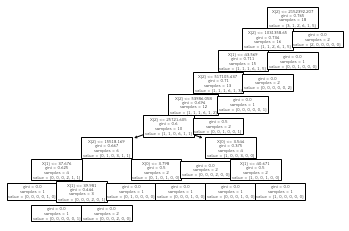

In [1936]:
plot_tree(mytree);

#สรุป

model ที่เหมาะสมที่สุดกับข้อมูลชุดนี้ คือ Decision Tree ซึ่งมีความแม่นยำ 42.10%

#Visulization

In [1937]:
import matplotlib as matplotlib # ทำการเช็ค version ของตัว library ดู ซึ่งเข้าใจว่าต้องเป็น version 3.2 ขึ้นไปเท่านั้นถึงจะใช้ได้ ถ้า version ต่ำกว่านี้ก็อาจจะต้องทำการอัพเดต version ก่อน
matplotlib.__version__

'3.2.2'

In [1938]:
# ทำการดาวน์โหลด font ในที่นี้ก็จะใช้โค้ดด้านล่างนี้ โหลด font ที่ชื่อว่า thsarabunnew
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [1939]:
matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')  #เพื่ม font ที่เรา download มาเข้าไปใน font manager ของ matplotlib พร้อมกับเซ็ตค่า font ที่จะใช้งานแสดงบนกราฟที่เราจะพล็อต
matplotlib.rc('font', family='TH Sarabun New')

No handles with labels found to put in legend.


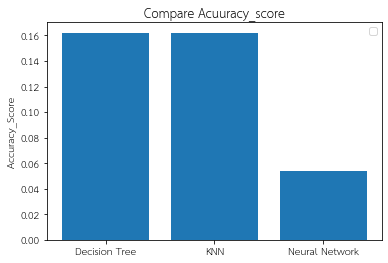

In [1940]:
from matplotlib import pyplot as plt

labels = ['Decision Tree', 'KNN', 'Neural Network']
accuracy_Y = [acc_decision_tree,acc_decision_tree,acc_NN]
#plot
plt.bar(labels,accuracy_Y)
plt.ylabel('Accuracy_Score')
plt.title('Compare Acuuracy_score')
plt.legend();

In [1941]:
#ใช้ข้อมูล product_category_name จัดกลุ่ม แล้วหาค่าเฉลี่ยของ freight_value
category_mean = data_1.groupby('ประเภทของระบบ')[['ผลเฉลี่ย']].mean().reset_index()
category_mean

,ประเภทของระบบ,ผลเฉลี่ย
0,ระบบกลุ่มอาคาร,40.905714
1,ระบบคลองวนเวียน,42.800000
2,ระบบจานหมุนชีวภาพ,42.280000
3,ระบบตะกอนเร่ง,53.400000
4,ระบบตะกอนเร่ง+บึงประดิษฐ์,41.870000
5,ระบบตะกอนเร่งแบบชีวมวล,40.000000
6,ระบบบึงประดิษฐ์,40.536667
7,ระบบบ่อปรับเสถียร,39.679655
8,ระบบบ่อปรับเสถียร+บึงประดิษฐ์,40.455000
9,ระบบรวบรวมน้ำเสีย,42.040000


No handles with labels found to put in legend.


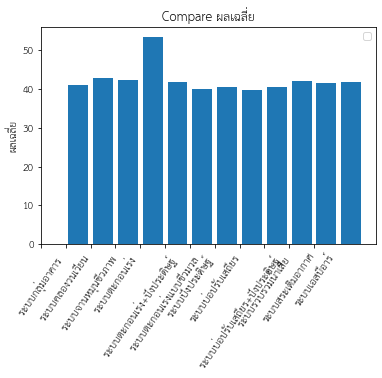

In [1942]:
plt.bar(np.arange(len(category_mean.iloc[:,1])), category_mean.iloc[:,1])

plt.ylabel('ผลเฉลี่ย')
plt.title('Compare ผลเฉลี่ย')
plt.xticks(np.arange(len(category_mean.iloc[:,0]))-1.5, category_mean.iloc[:,0],rotation=55)
plt.legend();

In [1943]:
change = category_mean['ผลเฉลี่ย'] > 40
mean_over40 = category_mean[change]
mean_over40

,ประเภทของระบบ,ผลเฉลี่ย
0,ระบบกลุ่มอาคาร,40.905714
1,ระบบคลองวนเวียน,42.800000
2,ระบบจานหมุนชีวภาพ,42.280000
3,ระบบตะกอนเร่ง,53.400000
4,ระบบตะกอนเร่ง+บึงประดิษฐ์,41.870000
6,ระบบบึงประดิษฐ์,40.536667
8,ระบบบ่อปรับเสถียร+บึงประดิษฐ์,40.455000
9,ระบบรวบรวมน้ำเสีย,42.040000
10,ระบบสระเติมอากาศ,41.486667
11,ระบบเอสบีอาร์,41.730000


No handles with labels found to put in legend.


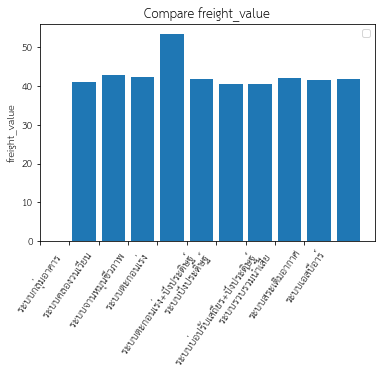

In [1944]:
plt.bar(np.arange(len(mean_over40.iloc[:,1])), mean_over40.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_over40.iloc[:,0]))-1.5, mean_over40.iloc[:,0],rotation=55)
plt.legend();

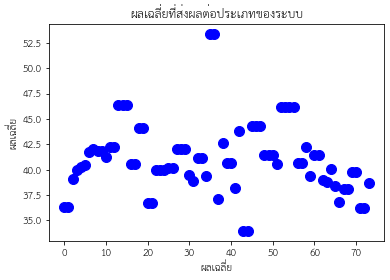

In [1945]:
plt.scatter(range(len(data_1['ประเภทของระบบ'])),data_1['ผลเฉลี่ย'],s=100,c='B')
plt.xlabel('ผลเฉลี่ย')
plt.ylabel('ผลเฉลี่ย')
plt.title('ผลเฉลี่ยที่ส่งผลต่อประเภทของระบบ')
plt.show()

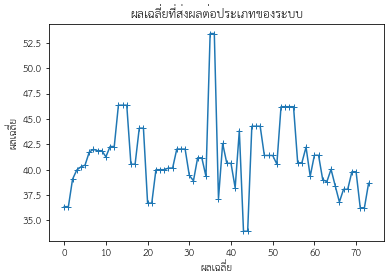

In [1946]:
plt.plot(range(len(data_1['ประเภทของระบบ'])),data_1['ผลเฉลี่ย'],marker='+')
plt.xlabel('ผลเฉลี่ย')
plt.ylabel('ผลเฉลี่ย')
plt.title('ผลเฉลี่ยที่ส่งผลต่อประเภทของระบบ')
plt.show()

In [1947]:
change2 = category_mean['ผลเฉลี่ย'] <= 40
mean_least40 = category_mean[change2]
mean_least40

,ประเภทของระบบ,ผลเฉลี่ย
5,ระบบตะกอนเร่งแบบชีวมวล,40.000000
7,ระบบบ่อปรับเสถียร,39.679655


No handles with labels found to put in legend.


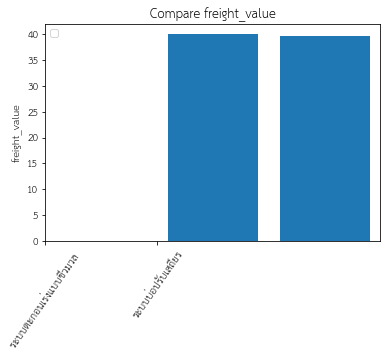

In [1948]:
plt.bar(np.arange(len(mean_least40.iloc[:,1])), mean_least40.iloc[:,1])

plt.ylabel('freight_value')
plt.title('Compare freight_value')
plt.xticks(np.arange(len(mean_least40.iloc[:,0]))-1.5, mean_least40.iloc[:,0],rotation=55)
plt.legend();

ดูค่าของ y หรือผลการทำนายประเภทระบบกำจัดของเสียที่ได้จาก Training Model ผลลัพธ์ที่ได้เป็นดังนี้

In [1949]:
perceptron3_final_result

array(['ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ', 'ระบบคลองวนเวียน ',
       'ระบบคลองวนเวียน '], dtype='<U30')

จากนั้นดูค่าของ X หรือข้อมูลที่เรานำมาใช้ในการทำนายหาประเภทระบบกำจัดของเสีย

In [1950]:
X_test

,โซน,ผลเฉลี่ย,รวมเฉลี่ย
36,2,53.40,22036.32
35,2,53.40,22036.32
19,4,44.09,333965.68
3,1,39.96,13634.01
44,6,33.94,39366.10
32,2,41.17,6377.28
1,1,36.36,160035.50
12,4,42.28,91429.56
16,4,40.54,18787.07
58,5,42.22,198263.24


จากนั้นทำกราฟแสดงผลการทำนายระหว่างประเภทของระบบกับผลเฉลี่ยและรวมเฉลี่ยได้ดังนี้

In [1951]:
from matplotlib import pyplot as plt ### Import
import matplotlib as matplotlib

In [1952]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  ##โหลด font ภาษาไทย

In [1953]:
matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') ##ติดตั้ง font ภาษาไทย
matplotlib.rc('font', family='TH Sarabun New')

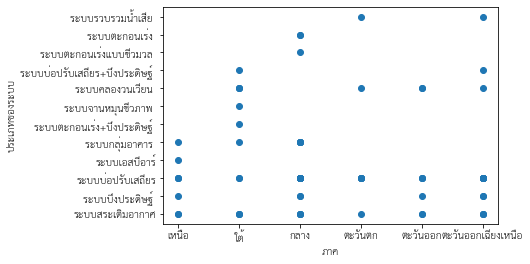

In [1954]:
plt.scatter(data=data_1,y='ประเภทของระบบ',x='ภาค') ##plot กราฟดูการกระจายของข้อมูล km และ จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x
plt.ylabel('ประเภทของระบบ')
plt.xlabel('ภาค')
plt.show()

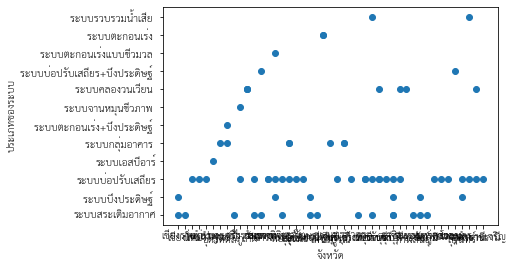

In [1955]:
plt.scatter(data=data_1,y='ประเภทของระบบ',x='จังหวัด') ##plot กราฟดูการกระจายของข้อมูล km และ จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x
plt.ylabel('ประเภทของระบบ')
plt.xlabel('จังหวัด')
plt.show()

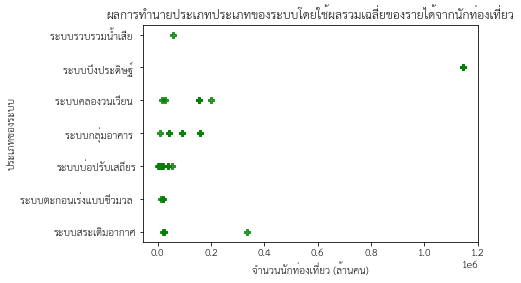

In [1956]:
plt.plot(X_test['รวมเฉลี่ย'],  mytree3_final_result,'Pg',alpha =0.8)
plt.xlabel('จำนวนนักท่องเที่ยว (ล้านคน)')
plt.ylabel('ประเภทของระบบ')
plt.title('ผลการทำนายประเภทประเภทของระบบโดยใช้ผลรวมเฉลี่ยของรายได้จากนักท่องเที่ยว')
plt.show()

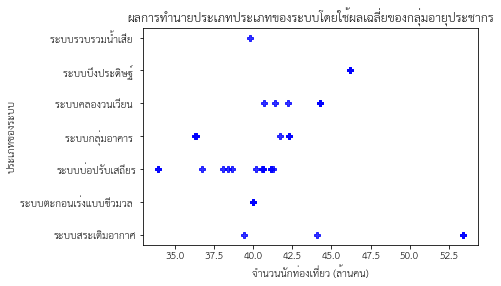

In [1957]:
plt.plot(X_test['ผลเฉลี่ย'],  mytree3_final_result,'Pb',alpha = 0.8) 
plt.xlabel('จำนวนนักท่องเที่ยว (ล้านคน)')
plt.ylabel('ประเภทของระบบ')
plt.title('ผลการทำนายประเภทประเภทของระบบโดยใช้ผลเฉลี่ยของกลุ่มอายุประชากร')
plt.show()